<a href="https://colab.research.google.com/github/sunilpateliit/GAN_generate_headshots_from_candid_pics/blob/main/Copy_of_basic_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PyTorch Lightning Basic GAN Tutorial

* **Author:** PL team
* **License:** CC BY-SA
* **Generated:** 2022-08-15T09:28:43.606365

How to train a GAN!

Main takeaways:
1. Generator and discriminator are arbitrary PyTorch modules.
2. training_step does both the generator and discriminator training.


---
Open in [Open In Colab{height="20px" width="117px"}](https://colab.research.google.com/github/PytorchLightning/lightning-tutorials/blob/publication/.notebooks/lightning_examples/basic-gan.ipynb)

Give us a ⭐ [on Github](https://www.github.com/PytorchLightning/pytorch-lightning/)
| Check out [the documentation](https://pytorch-lightning.readthedocs.io/en/stable/)
| Join us [on Slack](https://www.pytorchlightning.ai/community)

## Setup
This notebook requires some packages besides pytorch-lightning.

In [118]:
!pip install -Uqq fastai   duckduckgo-search

In [119]:
! pip install --quiet "pytorch-lightning>=1.4" "torch>=1.8`" "torchvision" "ipython[notebook]" "torchmetrics>=0.7" "setuptools==59.5.0"

/bin/bash: -c: line 0: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [68]:
############################################################################################################################################################################################################################################################################################################

In [69]:
## Preparation of Data 

In [14]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from time import sleep


path = Path('training_data')
candid_dest = (path/'candid')
headshot_dest = (path/'headshot')
candid_dest.mkdir(exist_ok=True, parents=True)
headshot_dest.mkdir(exist_ok=True, parents=True)


def clean_training_data(): 
    os.system('rm -rf ./training_data')

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

def get_the_candid_pics_and_the_headshots_of_the_actors():
  list_of_top_100_actor_actress = [' Ana de Armas',  ' Julia Garner',  ' Anya Chalotra',  ' Millie Bobby Brown',  ' Erin Moriarty',  ' Margot Robbie',  ' Aidan Gallagher',  ' Anya Taylor-Joy',  ' Linda Cardellini',  ' Henry Cavill',  ' Maria Bakalova',  ' Lauren Lapkus',  ' Victoria Pedretti',  ' Jurnee Smollett',  ' Chadwick Boseman',  ' Florence Pugh',  ' Alexandra Daddario',  ' Alison Brie',  ' Elizabeth Debicki',  ' Rachel McAdams',  ' Alba Baptista',  ' Eiza González',  ' Taika Waititi',  ' Antony Starr',  ' Katherine Langford',  ' Joey King',  ' Mary Elizabeth Winstead',  ' Rebecca Ferguson',  ' Sam Claflin',  ' Tom Hardy',  ' Karen Gillan',  ' Bryce Dallas Howard',  ' Sophia Lillis',  ' Jodie Comer',  ' Golshifteh Farahani',  ' Freya Allan',  ' Gina Carano',  ' Robert Sheehan',  ' Diana Silvers',  ' Pedro Pascal',  ' Aya Cash',  ' Bong Joon Ho',  ' Charlize Theron',  ' Betty Gilpin',  ' Evan Rachel Wood',  ' Brad Pitt',  ' Alexander Dreymon',  ' Lily James',  ' Fred Willard',  ' Samara Weaving',  ' Robert Pattinson',  ' Sarah Paulson',  ' Amber Heard',  ' Tom Hanks',  ' Madelyn Cline',  ' Hannah John-Kamen',  ' Christopher Nolan',  ' Lily Collins',  ' Emma Mackey',  ' Thomas Brodie-Sangster',  ' Tom Pelphrey',  ' JoAnna Garcia Swisher',  ' Morena Baccarin',  ' Leonardo DiCaprio',  ' Tom Cruise',  ' Jennifer Connelly',  ' Scarlett Johansson',  ' Carla Gugino',  ' Oliver Jackson-Cohen',  ' Ritu Arya',  ' Gustaf Skarsgård',  ' Jonathan Groff',  ' Tom Hopper',  ' Sacha Baron Cohen',  ' Joaquin Phoenix',  ' Dan Stevens',  ' Renée Zellweger',  ' Timothée Chalamet',  ' Harry Melling',  ' Iliza Shlesinger',  ' Elliot Page',  ' Vanessa Kirby',  ' Chase Stokes',  ' Laura Haddock',  ' Mackenzie Davis',  ' Zoey Deutch',  ' Jessie Buckley',  ' Elisabeth Shue',  ' Dan Levy',  ' Ashley Johnson',  ' Travis Fimmel',  ' Asa Butterfield',  ' Keanu Reeves',  ' Mark Wahlberg',  ' George MacKay',  ' Laysla De Oliveira',  ' Martha Higareda',  ' Jackie Sandler',  ' Taylor Zakhar Perez',  ' Emily Hampshire']

 
  for performer in list_of_top_100_actor_actress:  
    download_images(candid_dest, urls=search_images(f'casual {performer}', max_images=20), n_workers=5, max_pics=20, preserve_filename=False)
    sleep(1)  # Pause between searches to avoid over-loading server
    download_images(headshot_dest, urls=search_images(f'Professional Photoshoots Headshot of {performer}', max_images=20), n_workers=5, max_pics=20, preserve_filename=False)
    sleep(1)
    # resize_images(path/o, max_size=400, dest=path/o)

def rename_images(path: str):
    import os
    import datetime

    # path = '/path/to/folder'  # replace this with the path to your folder
    i = 1
    all_files = []
    for filename in os.listdir(path):
        # if filename.endswith('.jpg'):
            # get the creation time of the file
        creation_time = os.path.getctime(os.path.join(path, filename))

        # convert the creation time to a readable format
        creation_time = datetime.datetime.fromtimestamp(creation_time)
        all_files.append({'file_source': filename, 'creation_time': creation_time})

    # sort all the files by creation time 
    all_files = sorted(all_files, key=lambda x: x['creation_time'])
    
    for file_item in all_files:
        new_filename = f"""image{i}{os.path.splitext(file_item['file_source'])[1]}"""
        i += 1
        os.rename(os.path.join(path, file_item['file_source']), os.path.join(path, new_filename))
        

In [17]:
# clean_training_data()

In [20]:
def clean_images(path: str):
    for filename in os.listdir(path):
        try:
            # print(filename)
            with open(os.path.join(path, filename), "rb") as f:
                img = Image.open(f)
                img.convert("RGB")
        except Exception as e:
            os.system(f" rm -rf {os.path.join(path, filename)}")

In [ ]:
get_the_candid_pics_and_the_headshots_of_the_actors()

In [21]:
clean_images('./training_data/candid')
clean_images('./training_data/headshot')

In [22]:
rename_images('./training_data/candid')
rename_images('./training_data/headshot')

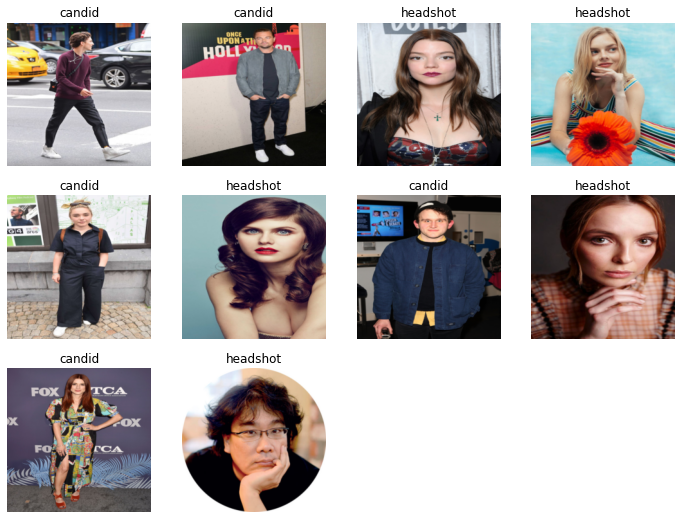

In [23]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(224, method='squish')],
    # batch_tfms=aug_transforms(),
).dataloaders('./training_data', bs=32)

dls.show_batch(max_n=10)

In [2]:
import torch
from torchvision import transforms, datasets
import pytorch_lightning as pl
from torch.utils.data import random_split

class ImageDataModule(pl.LightningDataModule):
    def __init__(self, data_dir: str, batch_size: int=32):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.transform = transforms.Compose([
            transforms.Resize(64),
            transforms.CenterCrop(64),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
        ])
        self.dims = (3, 64, 64)
        self.num_classes = 2

    def setup(self, stage=None):
        self.dataset = datasets.ImageFolder(
            root=self.data_dir,
            transform=self.transform
        )

        # Split dataset into train, validation, and test sets with a ratio of 80:10:10
        train_size = int(0.8 * len(self.dataset))
        val_size = (len(self.dataset) - train_size) // 2
        test_size = len(self.dataset) - val_size - train_size
        self.train_dataset, self.val_dataset, self.test_dataset = random_split(self.dataset, [train_size, val_size, test_size])

    def train_dataloader(self):
        return torch.utils.data.DataLoader(
            self.train_dataset, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return torch.utils.data.DataLoader(
            self.val_dataset, batch_size=self.batch_size)

    def test_dataloader(self):
        return torch.utils.data.DataLoader(
            self.test_dataset, batch_size=self.batch_size)

In [34]:
!ls -lart ./training_data/headshot | wc -l

1233


In [38]:
imd = ImageDataModule(data_dir='./training_data', batch_size=32)

In [39]:
imd.setup()

In [6]:
dl = imd.train_dataloader()

In [40]:
# Get the labels from the dataset
labels = imd.dataset.classes

print(labels)

['candid', 'headshot']


tensor([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 1])


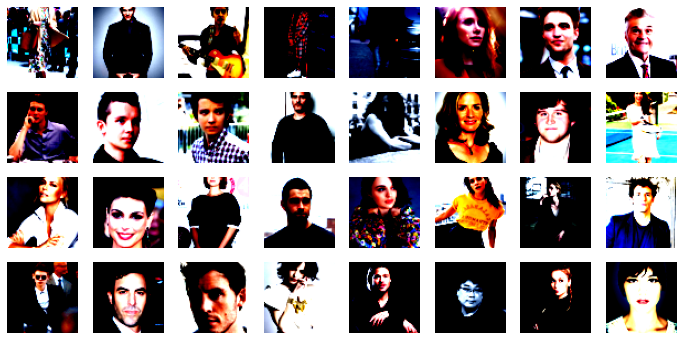

In [41]:
import matplotlib.pyplot as plt 
# Get the first batch of the training set
batch_idx, (x, y) = next(enumerate(imd.train_dataloader()))
print(y)
# Plot the images in the batch
fig, axs = plt.subplots(4, 8, figsize=(12, 6))
for i in range(4):
    for j in range(8):
        axs[i][j].imshow(x[i*8+j].permute(1, 2, 0))
        axs[i][j].axis('off')
plt.show()

In [42]:
# Iterate over the training dataloader and print the contents of the first batch
for batch_idx, (x, y) in enumerate(imd.train_dataloader()):
    print(f'Batch {batch_idx}: input data shape={x.shape}, target labels shape={y.shape}')
    break  # Only print the first batch

Batch 0: input data shape=torch.Size([32, 3, 64, 64]), target labels shape=torch.Size([32])


In [8]:
############################################################################################################################################################################################################################################################################################################

In [1]:
import os

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from pytorch_lightning import LightningDataModule, LightningModule, Trainer
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST

PATH_DATASETS = os.environ.get("PATH_DATASETS", ".")
BATCH_SIZE = 32 if torch.cuda.is_available() else 32
NUM_WORKERS = int(os.cpu_count() / 2)

### MNIST DataModule

Below, we define a DataModule for the MNIST Dataset. To learn more about DataModules, check out our tutorial
on them or see the [latest release docs](https://pytorch-lightning.readthedocs.io/en/stable/data/datamodule.html).

In [159]:
# class MNISTDataModule(LightningDataModule):
#     def __init__(
#         self,
#         data_dir: str = PATH_DATASETS,
#         batch_size: int = BATCH_SIZE,
#         num_workers: int = NUM_WORKERS,
#     ):
#         super().__init__()
#         self.data_dir = data_dir
#         self.batch_size = batch_size
#         self.num_workers = num_workers

#         self.transform = transforms.Compose(
#             [
#                 transforms.ToTensor(),
#                 transforms.Normalize((0.1307,), (0.3081,)),
#             ]
#         )

#         self.dims = (1, 28, 28)
#         self.num_classes = 10

#     def prepare_data(self):
#         # download
#         MNIST(self.data_dir, train=True, download=True)
#         MNIST(self.data_dir, train=False, download=True)

#     def setup(self, stage=None):
#         # Assign train/val datasets for use in dataloaders
#         if stage == "fit" or stage is None:
#             mnist_full = MNIST(self.data_dir, train=True, transform=self.transform)
#             self.mnist_train, self.mnist_val = random_split(mnist_full, [55000, 5000])

#         # Assign test dataset for use in dataloader(s)
#         if stage == "test" or stage is None:
#             self.mnist_test = MNIST(self.data_dir, train=False, transform=self.transform)

#     def train_dataloader(self):
#         return DataLoader(
#             self.mnist_train,
#             batch_size=self.batch_size,
#             num_workers=self.num_workers,
#         )

#     def val_dataloader(self):
#         return DataLoader(self.mnist_val, batch_size=self.batch_size, num_workers=self.num_workers)

#     def test_dataloader(self):
#         return DataLoader(self.mnist_test, batch_size=self.batch_size, num_workers=self.num_workers)

### A. Generator

In [47]:
# nn.ConvTranspose2d??

In [23]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, latent_dim, image_shape):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )
        self.image_shape = image_shape

    def forward(self, x):
        x = x.view(x.size(0), x.size(1), 1, 1)
        x = self.main(x)
        return x.view(x.size(0), *self.image_shape)

In [60]:
# def test_generator():
# import torch
# from torchvision.utils import save_image

# latent_dim = 100
# batch_size = 1

# # Create a random latent vector of size (batch_size, latent_dim)
# z = torch.randn(batch_size, latent_dim)

# # Create an instance of the Generator class
# generator = Generator(latent_dim)

# # Load a sample image of size (3, 64, 64)
# image = torch.randn(3, 64, 64)

# # Add a batch dimension to the image tensor
# image = image.unsqueeze(0)

# # Generate a synthetic image from the random latent vector
# synthetic_image = generator(z)

# # Save the synthetic image to disk
# save_image(synthetic_image, 'synthetic_image.png')

# # Display the synthetic image
# from PIL import Image
# im = Image.open('./synthetic_image.png')
# im.show()


In [58]:
!ls -lart synthetic_image.png

-rw-r--r-- 1 root root 8046 Feb 26 22:40 synthetic_image.png


In [54]:
# test_generator()

In [46]:
# class Generator(nn.Module):
#     def __init__(self, latent_dim, img_shape):
#         super().__init__()
#         self.img_shape = img_shape

#         def block(in_feat, out_feat, normalize=True):
#             layers = [nn.Linear(in_feat, out_feat)]
#             if normalize:
#                 layers.append(nn.BatchNorm1d(out_feat, 0.8))
#             layers.append(nn.LeakyReLU(0.2, inplace=True))
#             return layers

#         self.model = nn.Sequential(
#             *block(latent_dim, 32 * 32* 3, normalize=True),
#             *block(32 * 32* 3, 16 * 16 * 3),
#             *block(16 * 16 * 3, 8 * 8 * 3),
#             *block(8 * 8 * 3, 64 * 64 * 3),
#             nn.Linear(64 * 64 * 3, int(np.prod(img_shape))),
#             nn.Tanh(),
#         )

#     def forward(self, z):
#         img = self.model(z)
#         img = img.view(img.size(0), *self.img_shape)
#         return img

### B. Discriminator

In [17]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
        # self.input_size = input_size

    def forward(self, x):
        x = self.main(x)
        return x.view(-1, 1).squeeze()

In [8]:
# class Discriminator(nn.Module):
#     def __init__(self, img_shape):
#         super().__init__()

#         self.model = nn.Sequential(
#             nn.Linear(int(np.prod(img_shape)), 32 * 32 * 3),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Linear(32 * 32 * 3, 16 * 16 * 3),
#             nn.LeakyReLU(0.2, inplace=True),
#             nn.Linear(16 * 16 * 3, 1),
#             nn.Sigmoid(),
#         )

#     def forward(self, img):
#         img_flat = img.view(img.size(0), -1)
#         validity = self.model(img_flat)

#         return validity

### C. GAN

#### A couple of cool features to check out in this example...

  - We use `some_tensor.type_as(another_tensor)` to make sure we initialize new tensors on the right device (i.e. GPU, CPU).
    - Lightning will put your dataloader data on the right device automatically
    - In this example, we pull from latent dim on the fly, so we need to dynamically add tensors to the right device.
    - `type_as` is the way we recommend to do this.
  - This example shows how to use multiple dataloaders in your `LightningModule`.

In [29]:
class GAN(LightningModule):
    def __init__(
        self,
        channels=3,
        width=64,
        height=64,
        latent_dim: int = (3 * 64 * 64),
        lr: float = 0.0002,
        b1: float = 0.5,
        b2: float = 0.999,
        batch_size: int = BATCH_SIZE,
        **kwargs,
    ):
        super().__init__()
        self.save_hyperparameters()

        # networks
        data_shape = (channels, width, height)
        self.generator = Generator(latent_dim=self.hparams.latent_dim, image_shape=data_shape)
        self.discriminator = Discriminator()

        # self.validation_z = torch.randn(8, self.hparams.latent_dim)

        # self.example_input_array = torch.zeros(2, self.hparams.latent_dim)

    def forward(self, z):
        return self.generator(z)

    def adversarial_loss(self, y_hat, y):
        return F.binary_cross_entropy(y_hat.squeeze(), y.squeeze())

    def training_step(self, batch, batch_idx, optimizer_idx):
        # todo: get the candid image and the headshot images
        imgs, labels = batch
        candid_imgs = imgs[labels == 0]

        # flatten the candid images
        candid_imgs_unflattened = candid_imgs
        candid_imgs = candid_imgs.view(candid_imgs.size(0), -1)

        headshot_imgs = imgs[labels == 1]

        # instead of z replace it with the candid image 

        # sample noise
        # z = torch.randn(imgs.shape[0], self.hparams.latent_dim)
        # z = z.type_as(imgs)

        # train generator
        if optimizer_idx == 0:

            # generate images
            self.generated_imgs = self(candid_imgs)

            # log sampled images
            sample_imgs = self.generated_imgs[:6]
            grid = torchvision.utils.make_grid(sample_imgs)
            self.logger.experiment.add_image("generated_images", grid, 0)

            # # ground truth result (ie: all are headshots)
            # # put on GPU because we created this tensor inside training_loop
            valid = torch.ones(self.generated_imgs.size(0), 1)
            valid = valid.type_as(self.generated_imgs)

            # adversarial loss is binary cross-entropy
            g_loss = self.adversarial_loss(self.discriminator(self.generated_imgs), valid)
            self.log("g_loss", g_loss, prog_bar=True)
            return g_loss

        # train discriminator
        if optimizer_idx == 1:
            # Measure discriminator's ability to classify real from generated samples

            # # how well can it label as headshots?
            valid = torch.ones(headshot_imgs.size(0), 1)
            valid = valid.type_as(headshot_imgs)

            real_loss = self.adversarial_loss(self.discriminator(headshot_imgs), valid)

            # # how well can it label candid images?
            # fake = torch.ones(candid_imgs.size(0), 1)
            # fake = fake.type_as(candid_imgs)

            # # measure the discriminator's ability to classify the headsh
            # generated_image_loss = self.adversarial_loss(self.discriminator(self(candid_imgs)), fake)

             # how well can it label candid images?
            fake = torch.zeros(candid_imgs.size(0), 1)
            fake = fake.type_as(candid_imgs)

            # measure the discriminator's ability to classify the candid images as candid 
            generated_image_loss = self.adversarial_loss(self.discriminator(candid_imgs_unflattened), fake)


            # discriminator loss is the average of these
            d_loss = (generated_image_loss + real_loss ) / 2.0
            self.log("d_loss", d_loss, prog_bar=True)
            return d_loss

    def configure_optimizers(self):
        lr = self.hparams.lr
        b1 = self.hparams.b1
        b2 = self.hparams.b2

        opt_g = torch.optim.Adam(self.generator.parameters(), lr=lr, betas=(b1, b2))
        opt_d = torch.optim.Adam(self.discriminator.parameters(), lr=lr, betas=(b1, b2))
        return [opt_g, opt_d], []

    # def on_validation_epoch_end(self):
    #     z = self.validation_z.type_as(self.generator.model[0].weight)

    #     # log sampled images
    #     sample_imgs = self(z)
    #     grid = torchvision.utils.make_grid(sample_imgs)
    #     self.logger.experiment.add_image("generated_images", grid, self.current_epoch)

In [30]:
dm = ImageDataModule(data_dir='./training_data', batch_size=32)

In [31]:
model = GAN(*dm.dims)

In [32]:
trainer = Trainer(
    accelerator="auto",
    devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
    max_epochs=20,
    callbacks=[TQDMProgressBar(refresh_rate=20)],
)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model, dm)

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/configuration_validator.py:106: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params
------------------------------------------------
0 | generator     | Generator     | 103 M 
1 | discriminator | Discriminator | 2.8 M 
------------------------------------------------
106 M     Trainable params
0         Non-trainable params
106 M     Total params
424.745   Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

In [ ]:
# Start tensorboard.
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

## Congratulations - Time to Join the Community!

Congratulations on completing this notebook tutorial! If you enjoyed this and would like to join the Lightning
movement, you can do so in the following ways!

### Star [Lightning](https://github.com/PyTorchLightning/pytorch-lightning) on GitHub
The easiest way to help our community is just by starring the GitHub repos! This helps raise awareness of the cool
tools we're building.

### Join our [Slack](https://www.pytorchlightning.ai/community)!
The best way to keep up to date on the latest advancements is to join our community! Make sure to introduce yourself
and share your interests in `#general` channel


### Contributions !
The best way to contribute to our community is to become a code contributor! At any time you can go to
[Lightning](https://github.com/PyTorchLightning/pytorch-lightning) or [Bolt](https://github.com/PyTorchLightning/lightning-bolts)
GitHub Issues page and filter for "good first issue".

* [Lightning good first issue](https://github.com/PyTorchLightning/pytorch-lightning/issues?q=is%3Aopen+is%3Aissue+label%3A%22good+first+issue%22)
* [Bolt good first issue](https://github.com/PyTorchLightning/lightning-bolts/issues?q=is%3Aopen+is%3Aissue+label%3A%22good+first+issue%22)
* You can also contribute your own notebooks with useful examples !

### Great thanks from the entire Pytorch Lightning Team for your interest !

[Pytorch Lightning{height="60px" width="240px"}](https://pytorchlightning.ai)